# Capstone Project 3 : Bank Marketing Campaign
Moh. Ali Fauzi

28 Mei 2024

## A. Problem Understanding

### 1.1 Perkenalan

`Marketing campaign` bisa diartikan sebagai strategi untuk mempromosikan aspek-aspek bisnis. Contohnya seperti meningkatkan brand awareness serta mendapatkan feedback pelanggan.

`Marketing campaign` mencakup aktivitas bank untuk mempelajari lebih lanjut tentang nasabah, mengembangkan produk untuk memenuhi kebutuhan calon nasabah, dan merencanakan/meluncurkan kampanye untuk menjangkau calon nasabah baru.

Pada intinya, pemasaran bank dirancang untuk mencapai beberapa tujuan penting:
- Akuisisi dan retensi pelanggan: Strategi pemasaran yang efektif bagi bank dirancang untuk menarik perhatian calon nasabah dan menumbuhkan loyalitas di antara nasabah saat ini.
- Membangun merek: Pemasaran bank membantu membangun merek yang sesuai dengan nilai dan kebutuhan nasabah, sehingga meningkatkan reputasi dan kredibilitas bank.
- Promosi produk: Pemasaran bank harus memamerkan produk-produk bank dan memberi tahu nasabah mengenai manfaatnya dan mengapa produk tersebut cocok.
- Analisis dan adaptasi pasar: Memahami tren pasar dan perilaku pelanggan sangat penting. 

Strategi pemasaran bank melibatkan pemeriksaan tren secara terus-menerus dan selalu mengikuti perkembangan terkini.

`Marketing campaign` pada dasarnya hanya sebagian kecil dari seluruh strategi marketing, bukan bagian utamanya. Marketing campaign dilakukan dengan menggunakan berbagai media. Contohnya billboard, televisi, email, sampai media sosial.

Ada beberapa manfaat yang bisa didapatkan dari marketing campaign, diantaranya:
- Meningkatkan popularitas brand supaya lebih dikenal oleh publik.
- Mendapatkan koneksi ke pelanggan potensial, misalnya alamat email calon pelanggan.
- Meningkatkan jumlah penjualan produk yang dapat meningkatkan keuntungan perusahaan.

### 1.2 Business Problem Understanding

**Context :**  
Sebuah perusahaan perbankan (bank) yang bergerak di bidang pelayanan simpan pinjam, ingin merekrut nasabah baru. Bank ini ingin melakukan kampanye pemasaran tentang deposito berjangka, dan ingin mengetahui mana calon nasabah yang ingin melakukan deposit uang ke bank.

Target :

0 : Tidak melakukan deposit ke bank

1 : Melakukan deposit ke bank

**Problem Statement :**

Proses kampanye pemasaran bisa memakan waktu dan sumber daya jika bank menargetkan semua nasabah baru tanpa melakukan penyaringan terlebih dahulu. Perusahaan ingin meningkatkan efisiensi biaya dengan mengetahui nasabah mana yang benar-benar melakukan deposit ke bank.

Dan jika kampanye diberikan secara gratis kepada semua calon nasabah, maka biaya kampanye tersebut akan menjadi sia-sia jika calon nasabah yang mengikuti kampanye tersebut tapi pada akhirnya tidak mau melakukan deposit kepada bank.

**Goals :**

Maka berdasarkan permasalahan tersebut, bank ingin memiliki kemampuan untuk memprediksi kemungkinan potensi seorang calon nasabah akan/ingin melakukan deposit pada bank tersebut atau tidak, sehingga dapat memfokuskan kampanye khusus pada calon nasabah yang bersedia melakukan deposit.

Dan juga, bank juga ingin mengetahui penyebab/faktor/variabel apa yang membuat seorang calon nasabah mau melakukan deposit atau tidak, sehingga bank bisa membuat rencana yang lebih baik dalam mendekati calon nasabah potensial (kandidat yang punya keinginan tinggi dalam memilih bank untuk menyimpan uang mereka).

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan kandidat nasabah yang mau melakukan deposit pada bank dan yang menolak melakukan deposit.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang calon nasabah yang akan melakukan deposit.

### 1.3 Batasan Model

- Kurang bisa memprediksi data-data yang memiliki label unknown seperti pada kolom/ fitur `poutcome`
- Data hanya tersedia dalam 1 bulan saja yaitu Juni 2018.

### 1.4 Stakeholder

- Para atasan atau manager di Perusahaan Perbankan, sebagai bahan laporan untuk informasi kondisi pelayanan.
- Divisi pemasaran, sebagai bahan evaluasi dan alat bantu untuk membuat perencanaan pemasaran.

### 1.5 Metrik Evaluasi Bisnis

**CAC** (Customer Acquisition Cost) merupakan metrik yang menggambarkan biaya yang digunakan untuk mengubah prospek potensial menjadi pelanggan. Dengan kata lain, merupakan metrik yang digunakan untuk mengukur seberapa banyak biaya yang dibutuhkan untuk mendapatkan 1 pelanggan. Biasanya membutuhkan parameter berupa `biaya pemasaran`, `biaya penjualan`, dan `jumlah pelanggan baru`

Bisa dihitung dengan formula (biaya pemasaran + biaya penjualan) / jumlah pelanggan baru

### 1.6 Metrik Evaluasi Model Machine Learning

Membuat model yang dapat mengurangi biaya mendatangkan calon nasabah dari perusahaan bank tersebut, akan tetapi tanpa mengurangi jumlah kandidat potensial yang dibutuhkan perusahaan. Jadi saya ingin sebanyak mungkin `prediksi kelas positif` yang benar, dengan sesedikit mungkin `prediksi false positive`. Jadi nanti metrik utama yang akan kita gunakan adalah `roc_auc`.

## B. Data Understanding

Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh bank. Dataset bernama `data_bank_marketing_campaign` dan dapat diakses [di sini](https://drive.google.com/drive/folders/1ULLVuWCnqB53seL7oJmsHnZFAp2AmhGp?usp=sharing). Atau sumber yang lebih lengkap ada di 
[berikut](https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset).

**Catatan**: karena di dataset ini memiliki sekitar 17 kolom/ fitur, maka hanya dipilih sebagian saja, yaitu hanya 11 fitur.

Dataset ini berisi informasi tentang calon nasabah baru yang berhasil dicatat selama kampanye pemasaran. Berisi kampanye pemasaran dengan 2 kelompok fitur besar bernama `fitur profil pelanggan` dan `fitur data marketing`.  2 kelompok besar tersebut terbagi ke dalam 11 fitur utama dalam dataset `data_bank_marketing_campaign`, yaitu:

- Fitur profil pelanggan:
1. **Age** : Umur nasabah yang dihubungi.
2. **Job** : Pekerjaan nasabah.
3. **Balance** : Jumlah gaji yang dimiliki calon nasabah saat ini.
4. **Housing** : Apakah nasabah menyewa rumah sebagai tempat tinggal.
5. **Loan** : Apakah nasabah mempunyai hutang tertentu.

- Fitur data marketing:
1. **Contact** : Jenis kontak yang dihubungi (seluler / telepon).
2. **Month** : Bulan ke-berapa nasabah dihubungi oleh pihak bank.
3. **Campaign** : Berapa kali kontak dilakukan untuk menghubungi nasabah saat kampanye berlangsung.
4. **Pdays** : Jumlah hari saat nasabah dihubungi dari selisih hari di akhir kampanye sebelumnya.
5. **Poutcome** : Hasil dari kampanye periode sebelumnya.
6. **Deposit** : Apakah nasabah melakukan deposit atau tidak.

Selanjutnya saya akan melakukan import data untuk mengecek informasi apa saja yang tersedia.

## C. EDA (Exploratory Data Analysis)

### 3.1 Import library

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Save model
import pickle

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SelectKBest
from category_encoders import BinaryEncoder

# Balancing
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTEN, ADASYN, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from imblearn.combine import SMOTEENN, SMOTETomek

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Ensemble
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm.sklearn import LGBMClassifier

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate, StratifiedKFold, cross_val_score

# Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imb_pipeline

# Metric
from sklearn.metrics import classification_report, make_scorer, f1_score, recall_score, precision_score, roc_auc_score, fbeta_score
from imblearn.metrics import classification_report_imbalanced

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# Abaikan peringatan
import warnings
warnings.filterwarnings("ignore")

Langkah pertama yaitu cek 5 data teratas dan 5 data terbawah.

### 3.2 Mengecek data paling atas dan paling bawah

In [2]:
df = pd.read_csv("data_bank_marketing_campaign.csv")
display(df.head(), df.tail())

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no
7812,60,retired,1588,no,no,cellular,oct,1,-1,unknown,yes


Disini bisa dilihat terdapat 11 fitur dalam dataset `data_bank_marketing_campaign`. Dari sini, yang dijadikan kolom target adalah fitur `deposit`, maka selanjutnya akan dilihat deskripsi statistiknya

### 3.3 Mengecek deskripsi data melalui statistika deskriptif

In [3]:
# 3.3.1 Cek deskripsi
df.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


Dari fitur  bisa dilihat bahwa selama kampanye pemasaran, semua calon nasabah yang dihubungi berumur berkisar antara `18 tahun` sampai dengan `95 tahun`, dengan biaya yang dikeluarkan saat melakukan deposit uang berkisar antara `-6847 (berhutang)` sampai `66653` dengan kampanye (campaign) pemasaran dilakukan sebanyak 63 kali dan calon nasabah terlama yang dihubungi oleh pihak bank adalah 854 hari setelah berakhirnya program kampanye sebelumnya.

In [4]:
# 3.3.2 Cek jumlah kontak per kampanye yang berjalan
cek_kampanye = df['campaign'].value_counts().sort_values(ascending= False)
# urut berdasarkan kolom campaign
pd.DataFrame(cek_kampanye)

,count
campaign,
1,3354
2,2108
3,922
4,548
5,256
6,196
7,103
8,89
9,47


Dari dataset, terdapat total 32 jenis pemanggilan yang dilakukan bank selama kampanye berlangsung,misalnya:
- yang dihubungi 1 kali sebanyak 3354 calon nasabah 
- yang dihubungi 2 kali sebanyak 2108 calon nasabah, dan seterusnya dengan jumlah panggilan yang berbeda-beda pula. Bahkan ada yang dihubungi sebanyak 43 kali dalam periode 1 kampanye berlangsung.

In [5]:
# 3.3.3 cek nasabah mana yang berhasil deposit selama 42 kampanye berlangsung
df[df['deposit'] == 'yes']

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,yes
7,36,technician,911,yes,yes,cellular,may,2,21,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...
7802,63,retired,12067,no,no,telephone,apr,1,191,failure,yes
7805,47,management,159,no,no,telephone,oct,3,155,other,yes
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes


Dari 7813 nasabah baru yang dihubungi, yang berhasil deposit ini sekitar 3732, atau 47.76% pada sekitar 43 campaign yang berjalan dengan kolom fitur `balance` merupakan jumlah deposit yang ditawarkan kepada bank.

In [6]:
# 3.3.4 cek nasabah mana yang mempunyai hutang
# df[(df['loan'] == 'yes') & (df['deposit'] == 'yes')]
df[df['loan'] == 'yes']

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
7,36,technician,911,yes,yes,cellular,may,2,21,failure,yes
28,49,technician,1684,no,yes,cellular,jun,2,-1,unknown,yes
30,31,blue-collar,55,yes,yes,cellular,apr,2,-1,unknown,no
62,44,blue-collar,2,no,yes,telephone,jul,2,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7792,57,admin.,4168,yes,yes,unknown,may,1,-1,unknown,no
7795,41,technician,102,yes,yes,unknown,may,9,-1,unknown,no
7803,34,blue-collar,79,no,yes,cellular,nov,1,-1,unknown,no
7804,52,admin.,423,yes,yes,cellular,oct,2,96,failure,no


Dari 7813 nasabah baru yang dihubungi, yang mempunyai hutang sekitar 1024 orang, atau 13.1%. Akan tetapi belum diketahui kenapa nasabah mempunyai hutang dan belum diketahui juga apakah hutang berpengaruh pada keputusan nasabah dalam melakukan deposit.

### 3.4 Mengecek informasi dataset & tipe datanya

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


Terlihat bahwa nomor 7 (`campaign`) berisi tentang jumlah/ berapa banyak kampanye pemasaran yang dilakukan untuk menarik calon nasabah baru, dengan angka 1 mewakili kampanye ke-1, angka 2 mewakili kampanye ke-2, dan seterusnya. Maka dari itu,  data `campaign` tidak bisa dimasukkan ke tipe `integer`, melainkan masuk ke data tipe `kategorik` yaitu tipe `ordinal` karena kampanye ke-1, kampanye ke-2 tidak memiliki tingkatan kategorik. Oleh karena itu, saya akan mengubah tipe datanya dari `integer` menjadi `kategorik`.

### 3.5 Mengubah tipe data pada fitur `campaign`

In [8]:
# 3.5.1 Mengubah tipe data pada fitur `campaign`
df['campaign'] = df['campaign'].astype('object')

In [9]:
# 3.5.2 Mengecek tipe data yang baru
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   object
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(3), object(8)
memory usage: 671.6+ KB


Langkah selanjutnya setelah mengganti tipe data pada fitur yang tidak tepat, adalah mengecek data kosong dan data duplikat.

### 3.6 Mengecek nilai kosong (Null Values)

Mengecek nilai kosong dilakukan untuk melihat dan mengidentifikasi apakah ada data yang memiliki label NaN (atau disebut Null Values) atau label

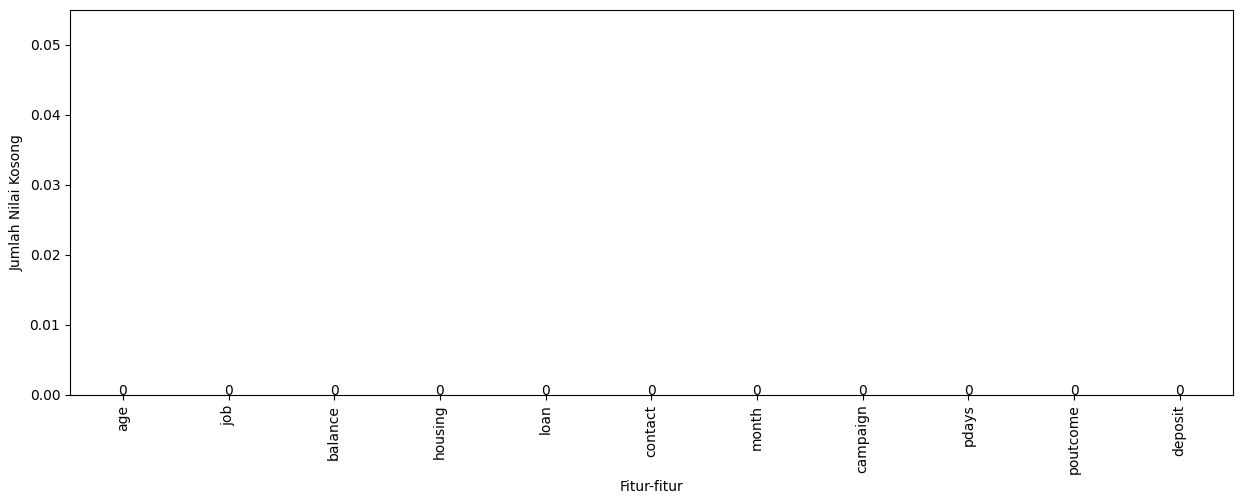

In [10]:
# 3.6.1 Mengecek nilai kosong (Null Values) secara Grafik visual
null_df = df.isnull().sum().reset_index()

plt.figure(figsize=(15,5))
ax = sns.barplot(x= null_df["index"], y= null_df[0], palette= "husl")
ax.set(xlabel= "Fitur-fitur", ylabel= "Jumlah Nilai Kosong")
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
ax.set_ylim(0)
[ax.text(index,value[1],value[1], color='black', ha="center") for index,value in enumerate(null_df.values)]
plt.show()

Jika dilihat secara sekilas, tidak ada titik warna yang masuk ke dalam grafik di sumbu x (fitur) dan sumbu y (Jumlah Nilai Kosong). Ini artinya, tidak ada nilai kosong yang muncul pada setiap fitur. Jika dilihat lebih spesifik secara perhitungan, maka akan terlihat lebih jelas seperti di bawah berikut: 

In [11]:
# 3.6.2 Mencari nilai kosong secara perhitungan
df.isnull().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

Disini terlihat lebih jelas bahwa **tidak ada nilai kosong** pada 11 kolom fitur. Maka dari itu, tidak perlu melakukan analisis lebih lanjut terhadap nilai kosong (jika ada nilai kosong, maka perlu dihapus/ diisi).

### 3.7 Mengecek data duplikat

In [175]:
# 3.7.1 cek jumlah data duplikat
print(f'Jumlah data duplikat : {df.duplicated(subset= None).sum()} buah')

Jumlah data duplikat : 8 buah


Ternyata setelah dilakukan pengecekan data duplikat, terdapat 8 data yg sama. Jika dilihat per baris maka tampilannya sebagai berikut.

In [14]:
# 3.7.2 cek daftar data duplikat
df[df.duplicated(subset= None)]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes


Setelah dilihat berdasarkan semua kolom, memang ada data yang mirip, akan tetapi tidak sama persis. Jadi saya akan melakukan drop baris pada kedelapan data duplikat ini.

In [15]:
# 3.7.3 Hapus data duplikat
dfNew = df.drop_duplicates(subset= None)

In [16]:
# 3.7.4 Cek kembali data duplikat
dfNew[dfNew.duplicated(subset= None)]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit


In [17]:
# 3.7.5 Cek kembali data lama dengan data baru
display(df, dfNew)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


Tabel dibawah adalah data baru yang sudah dihapus data duplikatnya dari 7813 data yaitu tersisa 7805 data.

### 3.8 Mengecek data unik pada setiap kolom

In [100]:
# Membuat tabel kolom berisi daftar fitur dan isi data uniknya
listItem = []
for col in dfNew.columns :
    listItem.append([ col, df[col].dtype, df[col].nunique(), list(df[col].unique()) ]);

tabelUnik = pd.DataFrame(data= listItem, columns= ['Fitur Data', 'Tipe Data',  'Jumlah Unik', 'Data Unik'])
tabelUnik

,Fitur Data,Tipe Data,Jumlah Unik,Data Unik
0,age,int64,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,12,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,2,"[no, yes]"
4,loan,object,2,"[no, yes]"
5,contact,object,3,"[cellular, telephone, unknown]"
6,month,object,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,object,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,4,"[unknown, other, failure, success]"


Kita juga bisa melihat secara per kolom individu, sebagai berikut.

#### 3.8.1 cek data unik pada kolom **age**

In [19]:
print(f'Jumlah data unik = { dfNew['age'].nunique() } dan berisi:')
dfNew['age'].unique()

Jumlah data unik = 75 dan berisi:


array([55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25,
       29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50,
       79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72,
       22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83,
       78, 74, 18, 85, 95, 86, 90], dtype=int64)

#### 3.8.2 cek data unik pada kolom **job**

In [20]:
print(f'Jumlah data unik = { dfNew['job'].nunique() } dan berisi:')
dfNew['job'].unique()

Jumlah data unik = 12 dan berisi:


array(['admin.', 'self-employed', 'services', 'housemaid', 'technician',
       'management', 'student', 'blue-collar', 'entrepreneur', 'retired',
       'unemployed', 'unknown'], dtype=object)

#### 3.8.3 cek data unik pada kolom **balance**

In [21]:
print(f'Jumlah data unik = { dfNew['balance'].nunique() } dan berisi:')
dfNew['balance'].unique()

Jumlah data unik = 3153 dan berisi:


array([ 1662, -3058,  3025, ...,  4108, 13901,  5473], dtype=int64)

#### 3.8.4 cek data unik pada kolom **housing**

In [22]:
print(f'Jumlah data unik = { dfNew['housing'].nunique() } dan berisi:')
dfNew['housing'].unique()

Jumlah data unik = 2 dan berisi:


array(['no', 'yes'], dtype=object)

#### 3.8.5 cek data unik pada kolom **loan**

In [23]:
print(f'Jumlah data unik = { dfNew['loan'].nunique() } dan berisi:')
dfNew['loan'].unique()

Jumlah data unik = 2 dan berisi:


array(['no', 'yes'], dtype=object)

#### 3.8.6 cek data unik pada kolom **contact**

In [24]:
print(f'Jumlah data unik = { dfNew['contact'].nunique() } dan berisi:')
dfNew['contact'].unique()

Jumlah data unik = 3 dan berisi:


array(['cellular', 'telephone', 'unknown'], dtype=object)

#### 3.8.7 cek data unik pada kolom **month**

In [25]:
print(f'Jumlah data unik = { dfNew['month'].nunique() } dan berisi:')
dfNew['month'].unique()

Jumlah data unik = 12 dan berisi:


array(['jun', 'apr', 'may', 'nov', 'jan', 'sep', 'feb', 'mar', 'aug',
       'jul', 'oct', 'dec'], dtype=object)

#### 3.8.8 cek data unik pada kolom **campaign**

In [26]:
print(f'Jumlah data unik = { dfNew['campaign'].nunique() } dan berisi:')
dfNew['campaign'].unique()

Jumlah data unik = 32 dan berisi:


array([2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15,
       18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43], dtype=object)

#### 3.8.9 cek data unik pada kolom **pdays**

In [27]:
print(f'Jumlah data unik = { dfNew['pdays'].nunique() } dan berisi:')
dfNew['pdays'].unique()
# dfNew

Jumlah data unik = 422 dan berisi:


array([ -1, 352,  21,  91, 186, 263,  96, 355, 294, 412,  89, 114, 276,
        93, 175,  57, 323, 156,  86,  95, 271, 182, 289, 334, 269, 309,
       144, 183, 417, 138, 254, 337, 171, 389,  87, 170, 165, 372, 247,
        98, 196, 469, 272, 104,  63, 587, 336, 145, 130,  28, 202, 324,
       147,  94, 328, 420, 179,  90,  81, 160, 298, 356, 357, 267, 430,
        52, 181, 365, 237, 330, 103, 374,  75, 133, 321, 204, 782, 266,
       197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251,
       301, 350,  92, 184, 345, 290, 199, 333, 169, 474,  13, 136,  99,
       305, 277, 466, 185, 504, 749,  84,  88, 344, 188, 300, 126, 264,
       244, 449, 128, 152, 368, 113, 433,  43, 210, 105, 329, 189, 154,
       148, 458,   5,   1, 348, 195, 340, 331, 370, 282, 339,  70,  24,
         9, 342, 106, 287,  80, 172,  85, 190, 316, 253, 285, 373, 119,
       242, 320, 205, 164, 139, 278, 250, 261, 118, 115, 384, 174, 149,
       178, 293, 121, 280, 828,  97, 338, 134,  73, 259, 312, 30

#### 3.8.10 cek data unik pada kolom **poutcome**

In [28]:
print(f'Jumlah data unik = { dfNew['poutcome'].nunique() } dan berisi:')
dfNew['poutcome'].unique()

Jumlah data unik = 4 dan berisi:


array(['unknown', 'other', 'failure', 'success'], dtype=object)

#### 3.8.11 cek data unik pada kolom **deposit**

In [29]:
print(f'Jumlah data unik = { dfNew['deposit'].nunique() } dan berisi:')
dfNew['deposit'].unique()

Jumlah data unik = 2 dan berisi:


array(['yes', 'no'], dtype=object)

### 3.9 Mengecek proporsi apakah muncul potensi imbalance

Sebuah kondisi data bisa dikatakan imbalance jika persebaran tiap kelas tidak proporsional pada data target, biasanya ditemui pada data pada kolom target. Berdasarkan teori, terdapat 3 kasus imbalance yaitu:
- Mild. Proporsi kelas minoritas yaitu 20% sampai 40%.
- Moderate. Proporsi kelas minoritas yaitu 1% sampai 20%.
- Extreme. Proporsi kelas minoritas yaitu dibawah 1%.

Disini saya akan mencoba melihat apakah distribusi data pada kolom fitur `deposit` seimbang atau tidak seimbang (imbalance).

In [30]:
# 3.9.1 Mengecek jumlah total data pada kolom `deposit`
totalDeposit = dfNew['deposit'].count()
totalDeposit

7805

Ini menunjukkan bahwa jumlah keseluruhan data pada kolom deposit sebesar 7805 data, yang mewakili semua nasabah yang berhasil dihubungi selama kampanye pemasaran. Lalu saya akan melihat berapa jumlah masing-masing nasabah yang akhirnya `berhasil melakukan deposit` dan `belum melakukan deposit`.

In [31]:
# 3.9.2 Mengecek jumlah data pada kolom `deposit` = Yes
DepositYes = dfNew[dfNew['deposit'] == 'yes'] # cek semua kolom yang berhasil lakukan deposit
DepositYes = DepositYes.loc[:, 'deposit'].count() # ambil kolom deposit lalu hitung jumlahnya
DepositYes

3730

Ini menunjukkan bahwa jumlah keseluruhan data pada nasabah yang `berhasil melakukan deposit` sebanyak 3730 nasabah. Berdasarkan jumlah tersebut, proporsi nasabah yang `berhasil melakukan deposit` adalah sebagai berikut:

In [32]:
# 3.9.3 Melihat proporsi 
result_DepositYes = (DepositYes / totalDeposit) * 100
print (f'Jumlah orang yang berhasil melakukan deposit yaitu {DepositYes}, \ndengan proporsi dari keseluruhan calon nasabah yaitu {round(result_DepositYes, 2)}%.')

Jumlah orang yang berhasil melakukan deposit yaitu 3730, 
dengan proporsi dari keseluruhan calon nasabah yaitu 47.79%.


Dari hasil perhitungan, kelompok nasabah yang `berhasil melakukan deposit` secara proporsi adalah 47.79% dari 7805 nasabah. Hasil ini akan dijadikan landasan untuk mengetahui kelompok nasabah yang `belum melakukan deposit`. Selanjutnya saya akan melihat secara perhitungan untuk nasabah yang nasabah yang `belum melakukan deposit`.

In [33]:
# 3.9.3 Mengecek jumlah data pada kolom `deposit` = No
DepositNo = dfNew[dfNew['deposit'] == 'no'] # cek semua kolom yang berhasil lakukan deposit
DepositNo = DepositNo.loc[:, 'deposit'].count() # ambil kolom deposit lalu hitung jumlahnya
DepositNo

4075

In [34]:
result_DepositNo = (DepositNo / totalDeposit) * 100
print (f'Jumlah orang yang tidak berhasil melakukan deposit yaitu {DepositNo}, \ndengan proporsi dari keseluruhan calon nasabah yaitu {round(result_DepositNo, 2)}%.')

Jumlah orang yang tidak berhasil melakukan deposit yaitu 4075, 
dengan proporsi dari keseluruhan calon nasabah yaitu 52.21%.


Setelah ditelusuri secara perhitungan, perbandingan antara `calon nasabah yang melakukan deposit` dengan `calon nasabah yang tidak melakukan deposit` yaitu `3730` banding `4075`, atau secara proporsi yaitu `47.79%` : `52.21%`. Jika dilihat secara grafis visual maka:

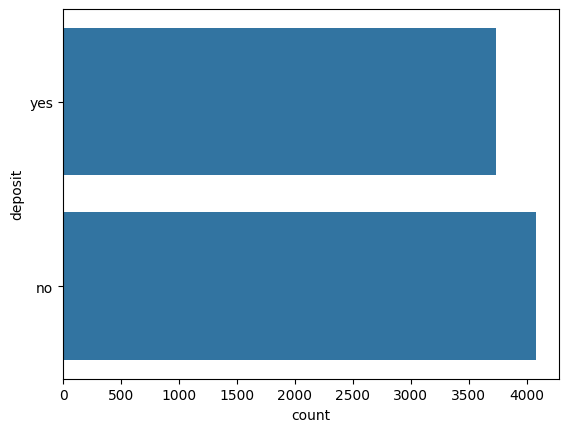

In [35]:
# 3.9.4 Melihat distribusi kolom deposit secara visual
sns.countplot(data= dfNew['deposit'])
plt.show()

Disini terlihat lebih jelas bahwa jumlah distribusi antara kedua kelas yaitu `kelas positif (yes)` dengan `kelas negatif (no)` hampir mirip. Maka data bisa dikatakan cukup seimbang (balance) dan tidak perlu melakukan sampling ulang (resampling). Atau nanti saya akan membuat model yang bisa membandingkan performa antara yang memakai metode resampling dan tidak memakai metode resampling.

## D. Data Preparation

### 4.1 Cek 5 data teratas dan buat daftar encoding/scaling

In [37]:
display(dfNew.head(), tabelUnik)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


,dataFeatures,dataType,unique,uniqueSample
0,age,int64,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,12,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,2,"[no, yes]"
4,loan,object,2,"[no, yes]"
5,contact,object,3,"[cellular, telephone, unknown]"
6,month,object,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,object,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,4,"[unknown, other, failure, success]"


dari 5 data sampel, bisa dilihat ada fitur numerik dan fitur kategorik, diantaranya:

Fitur numerik:
- age
- balance
- pdays

Fitur kategorik:
- job
- housing
- loan
- contact
- month
- campaign
- poutcome
- deposit

Selanjutnya saya akan melakukan penanganan untuk fitur numerik dan kategorik.

#### 4.1.1 Menentukan metode scaling pada fitur numerik

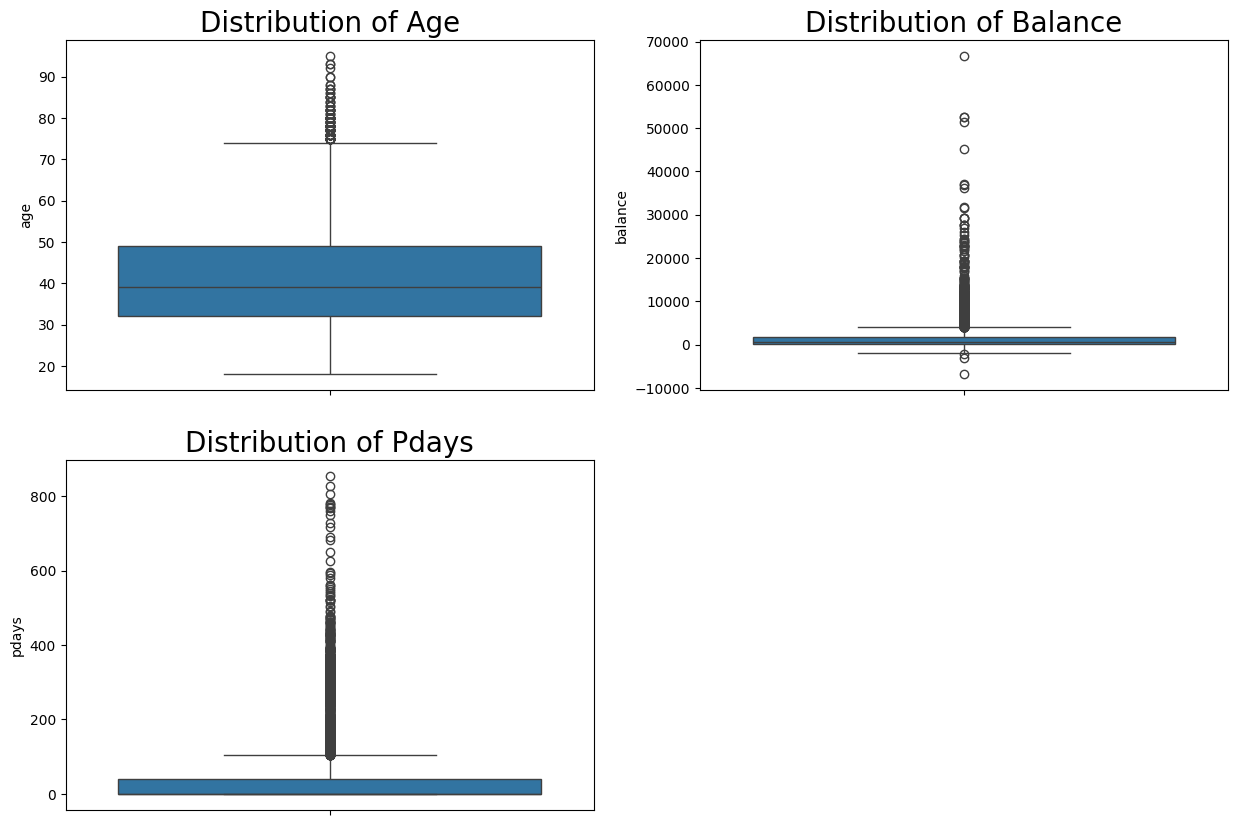

In [38]:
# 4.1.1.a cek outlier pada fitur numerik
plt.figure(figsize=(15,10))
# -- diagram boxplot untuk kolom umur --#
plt.subplot(2,2,1)
sns.boxplot(dfNew['age'])
plt.title('Distribution of Age',fontsize=20)
# -- diagram boxplot untuk kolom balance --#
plt.subplot(2,2,2)
sns.boxplot(dfNew['balance'])
plt.title('Distribution of Balance',fontsize=20)
# -- diagram boxplot untuk kolom pdays --#
plt.subplot(2,2,3)
sns.boxplot(dfNew['pdays'])
plt.title('Distribution of Pdays',fontsize=20)
# -- tampilkan visualisasi --#
plt.show()

Dari 3 fitur numerik, bisa dilihat bahwa terdapat `outlier` dan bahkan ada yang `outlier ekstrim`. Untuk menangani hal tersebut, bisa dilakukan penghapusan untuk `outlier` dan `outlier ekstrim`, atau melakukan metode scaling yang tahan terhadap data `outlier`, yaitu `robust scaler`.

#### 4.1.b Menentukan metode encoding pada fitur kategorik

Sekarang mari melakukan fitur encoding untuk fitur-fitur kategorik yang saya miliki.
Yang akan saya lakukan adalah :

1. Pada fitur/kolom `job`, merubah fitur/kolom `job` menggunakan `Binary Encoding`, karena fitur ini memiliki data unik yang banyak (12 buah) dan tidak memiliki urutan/tidak ordinal. Bila saya menggunakan One Hot Encoding, akan terlalu banyak fitur baru yg terbuat. Dan kalau saya menggunakan Ordinal/Label Encoding, hasilnya dapat kurang cocok/kurang baik. Oleh karena itu saya akan mencoba menggunakan `Binary Encoding` saja.
2. Pada fitur/kolom `housing`, merubah fitur/kolom `housing` menggunakan `One Hot Encoding`, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah data uniknya sedikit (2 buah).
3. Pada fitur/kolom `loan`, merubah fitur/kolom `loan` menggunakan `One Hot Encoding`, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah data uniknya sedikit (2 buah).
4. Pada fitur/kolom `contact`, merubah fitur/kolom `contact` menggunakan `One Hot Encoding`, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah data uniknya sedikit (3 buah).
5. Pada fitur/kolom `month`, merubah fitur/kolom `month` menggunakan `Binary Encoding`, karena fitur ini tidak memiliki urutan/tidak ordinal, akan tetapi jumlah data uniknya banyak (12 buah). Bila saya menggunakan One Hot Encoding, akan terlalu banyak fitur baru yg terbuat.
6. Pada fitur/kolom `campaign`, merubah fitur/kolom `campaign` menggunakan `Binary Encoding`, karena fitur ini tidak memiliki urutan/tidak ordinal, akan tetapi jumlah data uniknya banyak (32 buah). Bila saya menggunakan One Hot Encoding, akan terlalu banyak fitur baru yg terbuat.
7. Pada fitur/kolom `poutcome`, merubah fitur/kolom `poutcome` menggunakan `One Hot Encoding`, karena fitur ini tidak memiliki urutan/tidak ordinal, dan jumlah data uniknya sedikit (4 buah).
8. Pada fitur/kolom `deposit`, tidak merubah fitur/kolom `deposit` menggunakan `One Hot Encoding` karena fitur ini akan dijadikan sebuah data target jadi tidak usah diotak-atik.

## E. Data Prepocessing

### 5.1 Membuat column transformer

In [39]:
# 5.2.1 mengubah data kategorikal menjadi numerikal
transformer = ColumnTransformer([
    ('scaling', RobustScaler(), ['age','balance', 'pdays']),
    ('onehot', OneHotEncoder(drop='first'), ['housing','loan', 'contact', 'poutcome']),
    # ('ordinal', OrdinalEncoder(mapping= ordinal_mapping), ['experience']),
    ('binary', BinaryEncoder(), ['job', 'month', 'campaign'])
], remainder='passthrough')

Disini saya tidak melakukan `one hot encoding` pada kolom `deposit`, karena nantinya fitur `deposit` akan dibuat menjadi data target (y_train dan y_test) dan nantinya dipisah dari kolom features. 

Kalau dilakukan encoding, nanti akan muncul pesan error ketika melakukan `transformer.fit` pada `x_train` karena kolom `deposit` tidak ada di kolom `x_train.`

In [40]:
# 5.2.2 Melihat hasil column transformer awal
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaling', RobustScaler(),
                                 ['age', 'balance', 'pdays']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['housing', 'loan', 'contact', 'poutcome']),
                                ('binary', BinaryEncoder(),
                                 ['job', 'month', 'campaign'])])

Setelah membuat `column transformer`, selanjutnya `menyimpan model` setelah nanti menemukan model prediksi terbaik, lalu langkah selanjutnya akan memisahkan mana kolom/fitur yang menjadi `target` dan kolom/fitur yang menjadi `features`.

### 5.2 Memisahkan target dan feature (data splitting)

Disini saya akan memakai kolom/fitur `deposit` sebagai data label targetnya, dan 10 fitur sisanya sebagat data label fitur.

In [41]:
# 5.2.1 Memisahkan data independen variabel (feature) dengan target
features = dfNew.drop(columns=['deposit'], axis= 1) # feature
target = dfNew['deposit'] # target

In [42]:
# 5.2.2 melihat data feature
features

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown
2,51,admin.,3025,no,no,cellular,may,1,352,other
3,38,services,-87,yes,no,cellular,may,1,-1,unknown
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown
...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown


Untuk data features terdiri dari semua kolom-kolom selain dari kolom `deposit`.

In [43]:
# 5.2.2 melihat data target
target = pd.DataFrame (data= target)
target

,deposit
0,yes
1,yes
2,yes
3,no
4,no
...,...
7808,yes
7809,yes
7810,no
7811,no


karena fitur target deposit masih berbentuk `series` (array 1 dimensi), maka diubah menjadi `dataframe` (array 2 dimensi) agar nanti bisa dilakukan proses fit dan transform, karena proses fit dan transform salah satu syaratnya adalah data harus berupa `dataframe`.

Setelah dipisah antara kolom fitur dan targetnya, maka selanjutnya adalah memisahkan antara data training dengan testing.

### 5.3 Train-test splitting 

#### 5.3.1 Splitting data training dan testing dengan proporsi 70% training : 30% testing

In [44]:
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
	features, target, stratify= target, test_size= 0.3, random_state= 48)
	# stratify= mengacu pada data targetnya
print("shape dari x_train (features) : ", x_train.shape)
print("shape dari y_train (target) : ", y_train.shape)

shape dari x_train (features) :  (5463, 10)
shape dari y_train (target) :  (5463, 1)


Setelah melakukan data splitting dengan proporsi `70% data training` dan `30% data testing`, data training pada fitur bernama `features`(atau `x_train`) memiliki 5463 baris dan 10 kolom, serta data training pada fitur bernama `target` terdiri dari 5463 baris dan 1 kolom. Maka selanjutnya adalah mengecek 5 sampel data untuk mengetahui informasi data tersebut.

#### 5.3.2 melihat kolom pada x_train

In [45]:
x_train.head(5)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
2869,59,housemaid,454,no,no,cellular,aug,1,-1,unknown
7397,38,services,0,yes,no,cellular,apr,1,147,failure
1728,38,self-employed,1612,yes,no,cellular,may,1,-1,unknown
156,49,technician,905,no,no,cellular,jun,1,-1,unknown
763,26,entrepreneur,725,no,no,cellular,feb,2,189,other


#### 5.3.3 melihat pada cek kolom y_train

In [46]:
y_train.head(5)

,deposit
2869,no
7397,no
1728,yes
156,yes
763,yes


Setelah dilakukan pengecekan informasi data, selanjutnya lakukan `fitting` dan `transform` pada `column transformer` untuk menerapkan metode `scalling`, `sampling` dan `encoding` pada `data training`.

### 5.4 Melakukan fitting pada column transformer untuk data training

In [47]:
transformer.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaling', RobustScaler(),
                                 ['age', 'balance', 'pdays']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['housing', 'loan', 'contact', 'poutcome']),
                                ('binary', BinaryEncoder(),
                                 ['job', 'month', 'campaign'])])

#### 5.4.1 Menampilkan hasil fit dan transform dari column transformer

In [48]:
pd.DataFrame(data= transformer.transform(x_train))

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.176471,-0.064824,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.058824,-0.353352,2.596491,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.058824,0.671115,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.588235,0.221799,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.764706,0.107404,3.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,-0.529412,-0.087703,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5459,-0.117647,0.573244,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5460,-0.294118,-0.095964,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5461,0.058824,0.439784,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Disini bisa terlihat bahwa column transformer berhasil melakukan fitting dan transform. Akan tetapi label pada kolom fitur masih berupa 0 (nol), 1 (satu), 2 (dua), dan lain sebagainya. Ini belum jelas bahwa fitur 0, 1, 2 dan seterusnya menampilkan informasi apa. Oleh karena itu, saya akan melakukan ekstrak label fitur dari column transformer dengan fungsi yang bernama `get_feature_names_out()`.

#### 5.4.2 Melihat fitur yang bisa diekstrak dari column transformer

In [49]:
transformer.get_feature_names_out()

array(['scaling__age', 'scaling__balance', 'scaling__pdays',
       'onehot__housing_yes', 'onehot__loan_yes',
       'onehot__contact_telephone', 'onehot__contact_unknown',
       'onehot__poutcome_other', 'onehot__poutcome_success',
       'onehot__poutcome_unknown', 'binary__job_0', 'binary__job_1',
       'binary__job_2', 'binary__job_3', 'binary__month_0',
       'binary__month_1', 'binary__month_2', 'binary__month_3',
       'binary__campaign_0', 'binary__campaign_1', 'binary__campaign_2',
       'binary__campaign_3', 'binary__campaign_4'], dtype=object)

Setelah mendapatkan `nama-nama kolom`, maka selanjutnya adalah menerapkan `nama-nama kolom` kedalam `fitur column transformer` yang sudah dibuat sebelumnya.

#### 5.4.3 Menampilkan hasil fit-transform dari column transformer dengan nama kolom yang baru

In [50]:
pd.DataFrame(data= transformer.transform(x_train),
			columns= transformer.get_feature_names_out())

,scaling__age,scaling__balance,scaling__pdays,onehot__housing_yes,onehot__loan_yes,onehot__contact_telephone,onehot__contact_unknown,onehot__poutcome_other,onehot__poutcome_success,onehot__poutcome_unknown,...,binary__job_3,binary__month_0,binary__month_1,binary__month_2,binary__month_3,binary__campaign_0,binary__campaign_1,binary__campaign_2,binary__campaign_3,binary__campaign_4
0,1.176471,-0.064824,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.058824,-0.353352,2.596491,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.058824,0.671115,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.588235,0.221799,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.764706,0.107404,3.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,-0.529412,-0.087703,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5459,-0.117647,0.573244,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5460,-0.294118,-0.095964,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5461,0.058824,0.439784,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Hasil tampilan dari column transformer kira-kira seperti diatas. Setelah melakukan metode `scaling`, `encoding`, dan membuat `column transformer`, maka selanjutnya adalah membuat model dan evaluasi.

## F. Modeling dan Evaluasi

Untuk membuat model sebagai pembelajaran untuk prediksi, saya memakai beberapa model, diantaranya:
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Decision Tree
- XGBoost
- Random Forest
- LGBM

#### 6.1 Membuat inisialisasi model machine learning

In [85]:
# 6.1.1 Membuat inisialisasi
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier(verbosity = -1) # untuk menekan log output khusus untuk model LGBM
le = LabelEncoder()

#### 6.2 Model Benchmarking: K-Fold Cross-Validation Train Data

##### 6.2.1 melakukan pelabelan untuk kolom target yaitu kolom deposit

In [52]:
y_train = le.fit_transform(y_train) # pengaturan terbaru di xgboost dengan LabelEncoder
y_test = le.fit_transform(y_test)

Khusus untuk `model XGBoost`, di versi terbaru diharuskan melakukan `encoding` pada kolom `data target` (fitur deposit) baik pada `y_train` maupun `y_test`. Karena hal inilah, dilakukan import pada `LabelEncoder` lalu melakukan fungsi `LabelEncoder` secara terpisah, khusus untuk `data target` saja.

##### 6.2.2 Membuat perbandingan skor evaluasi di prediksi data training untuk melihat model terbaik

In [158]:
list_models = [logreg, knn, dt, rf, xgb, lgbm]
score=[]
rata=[]
std=[]

for i in list_models:
	skfold = StratifiedKFold (n_splits= 5)
	estimator = Pipeline(steps= [
		('preprocessing',transformer),
		('model', i)])
	model_cv = cross_val_score(estimator, x_train, y_train, cv= skfold, scoring='roc_auc', verbose= 0)
	score.append(model_cv)
	rata.append(model_cv.mean())
	std.append(model_cv.std())
# Menampilkan hasil skor prediksi ke dalam tabel dataframe 
pd.DataFrame({
			'model':['Logistic Regression', 'KNN', 'Decision Tree', 
					'Random Forest', 'XGBoost', 'LightGBM'], 
			'mean_roc_auc':rata,
			'sdev':std}).set_index('model').sort_values(by='mean_roc_auc',ascending= False)
# Tidak menampilkan classification report untuk semua model di data training

,mean_roc_auc,sdev
model,,
LightGBM,0.764914,0.014466
Logistic Regression,0.752256,0.014750
Random Forest,0.751604,0.011618
XGBoost,0.747888,0.011866
KNN,0.702858,0.019188
Decision Tree,0.630198,0.013993


Terlihat bahwa model LightGBM adalah yang terbaik untuk roc_aucnya dari setiap model yang menggunakan parameter model default.

### 6.3 Model Benchmarking: Test Data

#### 6.3.1 melakukan prediksi dengan beberapa model untuk data testing untuk mendapat model terbaik

In [87]:
list_model = [logreg, knn, dt, rf, xgb, lgbm]
score_roc_auc = []

def predict (i):
    estimator= Pipeline (steps= [
        ('preprocessing', transformer),
        ('model', i)])
    x_train, x_test
    
    estimator.fit(x_train, y_train)
    return ( estimator, estimator.predict(x_test), x_test )

for i, j in zip (list_model, ['Logistic Regression', 'KNN', 'Decision Tree', 
								'Random Forest', 'XGBoost','LightGBM']):
    estimator, y_pred, x_test = predict (i)
    y_predict_proba = estimator.predict_proba (x_test) [:, 1]
    score_roc_auc.append (roc_auc_score (y_test, y_predict_proba))
    print(j,'\n', classification_report (y_test, y_pred))
    
pd.DataFrame({'model': ['Logistic Regression', 'KNN', 'Decision Tree', 
                        'Random Forest', 'XGBoost','LightGBM'],
			'Roc_Auc Score Test':score_roc_auc}).set_index ('model').sort_values (by= 'Roc_Auc Score Test', ascending= False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.66      0.77      0.71      1223
           1       0.69      0.56      0.62      1119

    accuracy                           0.67      2342
   macro avg       0.68      0.67      0.67      2342
weighted avg       0.67      0.67      0.67      2342

KNN 
               precision    recall  f1-score   support

           0       0.66      0.73      0.70      1223
           1       0.67      0.59      0.63      1119

    accuracy                           0.67      2342
   macro avg       0.67      0.66      0.66      2342
weighted avg       0.67      0.67      0.66      2342

Decision Tree 
               precision    recall  f1-score   support

           0       0.66      0.65      0.65      1223
           1       0.62      0.63      0.62      1119

    accuracy                           0.64      2342
   macro avg       0.64      0.64      0.64      2342
weighted avg       0.64      0

,Roc_Auc Score Test
model,
LightGBM,0.757718
Random Forest,0.745856
XGBoost,0.744905
Logistic Regression,0.736164
KNN,0.705011
Decision Tree,0.638655


Bisa dilhat kembali bahwa model LightGBM adalah yang terbaik performanya pada `data testing` dengan skor roc_auc `0.758`.

Selanjutnya mari melakukan `hyperparameter tuning` pada model LightGBM untuk mendapatkan hasil yang lebih baik lagi. Tapi sebelum melakukan `hyperparameter tuning`, terlebih dahulu `menyimpan model prediksi terbaik` agar nanti tidak perlu repot menjalankan proses dari awal dengan mengganti nama variabel `estimator` menjadi `predictor`.

#### 6.3.2 Membandingkan performa data training dan data testing

| Model | Train roc_auc | Test roc_auc |
|-|-|-|
| LightGBM | 0.764914 | 0.757718 |

Setelah dilakukan prediksi pada `data training` dan `data testing`, didapatkan performa `data training` yaitu `0.7649` dan performa`data testing` yaitu `0.7577`. Ini menunjukkan bahwa model LightGBM ini tidak mengalami `underfitting` maupun `overfitting`. 

`Underfitting` adalah suatu kondisi dimana performa pada data training yaitu sangat membaik (80 sampai 90%), akan tetapi performa pada data testing yaitu sangat rendah atau anjlok (60% atau 70%), dengan selisih performa yang sangat besar (selisih 10% atau bahkan lebih).

`Overfitting` adalah kebalikan dari `underfitting`, suatu kondisi dimana performa pada data training yaitu sangat rendah atau anjlok (60% atau 70%), akan tetapi performa pada data testing yaitu sangat membaik (80 sampai 90%), dengan selisih performa yang sangat besar (selisih 10% atau bahkan lebih).

Karena model LightGBM yang saya pakai ini memiliki proporsi yang seimbang (yaitu selisih performa dibawah 10% atau lebih tepatnya 0.7195%), maka bisa dikatakan bahwa model ini merupakan model yang baik.

#### 6.3.3 Membuat file output terpisah berisi model terbaik

In [88]:
# 6.3.3.1 membuat estimator khusus untuk model terbaik
predictor = Pipeline(steps= [
	('preprocessing',transformer),
	('model', LGBMClassifier(verbosity = -1) )]) # verbosity untuk menekan log output
	# ('model', lgbm)]) # karena sudah di inisialisasi sebelumnya

In [89]:
# 6.3.3.2 Melakukan fitting pada model terbaik
predictor.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', RobustScaler(),
                                                  ['age', 'balance', 'pdays']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job', 'month',
                                                   'campaign'])])),
                ('model', LGBMClassifier(verbosity=-1))])

#### 6.3.4 Menyimpan model setelah dilakukan fitting estimator

In [143]:
# import pickle
filename = 'lgbmClassifier.sav'
pickle.dump(predictor, open(filename,'wb'))

Setelah menyimpan model terbaik ke dalam file output terpisah, langkah selanjutnya adalah melakukan `hyperparameter tuning` pada model LightGBM untuk mendapatkan hasil performa yang lebih baik lagi.

## G. Hyperparameter Tuning

Referensi :

1. https://lightgbm.readthedocs.io/en/latest/Parameters.html
2. https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
3. https://stackoverflow.com/questions/58815016/cross-validating-with-imblearn-pipeline-and-gridsearchcv
4. https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html#sphx-glr-auto-examples-compose-plot-compare-reduction-py

### 7.1 Membuat pipeline dan parameter untuk tuning

Referensi : [Dokumentasi LGBM](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)

Untuk melakukan parameter tuning, saya akan melakukan `grid search` untuk menentukan parameter terbaik untuk dibandingkan dengan hasil `roc_auc` sebelum dilakukan tuning. Parameter yang akan digunakan untuk tuning adalah:

- boosting_type
- num_leaves
- n_estimators
- learning_rate

Dengan parameter LGBM untuk default adalah: 
- max_bin = 255
- num_leaves = 31
- min_data_in_leaf = 20
- n_estimators = 100
- learning_rate = 0.1
- boosting_type = gdbt atau traditional Gradient Boosting Decision Tree

#### 7.1.1 Membuat pipeline khusus untuk model LGBM

In [94]:
lgbm = LGBMClassifier(verbosity= -1)

estimator= Pipeline(steps= [
    ('preprocessing', transformer),
    ('model', lgbm)
])

#### 7.1.2 Menentukan parameter untuk dilakukan tuning

In [95]:
param_space=[{
	'model__boosting_type': ['gdbt', 'dart', 'rf'],
    'model__num_leaves': [21, 31, 41],
    'model__n_estimators': [80, 100, 150],
    'model__learning_rate':  [0.1, 0.05, 0.125]
}]

### 7.2 Melakukan grid search

#### 7.2.1 Menjalankan grid search untuk data train

In [96]:
gridSearchLgbm = GridSearchCV (
	estimator = estimator, 
	n_jobs= -1, 
	param_grid= param_space, 
	scoring= 'roc_auc', 
	cv= StratifiedKFold (n_splits=5, shuffle=True, random_state=48),
)

#### 7.2.2 Melakukan fitting pada data train

In [97]:
gridSearchLgbm.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=48, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling',
                                                                         RobustScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'pdays']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['job',
                                                                          'month',
                                                                          'campaign'])])),
                                       ('model',
                                        LGBMClassifier(verbosity=-1))]),
             n_jobs=-1,
             param_grid=[{'model__boosting_type': ['gdbt', 'dart', 'rf'],
                          'model__learning_rate': [0.1, 0.05, 0.125],
                          'model__n_estimators': [80, 100, 150],
                          'model__num_leaves': [21, 31, 41]}],
             scoring='roc_auc')

menyimpan model hasil fitting kedalam format `sav` supaya bisa dibuka kembali tanpa perlu dijalankan ulang.

Selanjutnya, saya akan cari `skor terbaik` dan `parameter terbaik`.

#### 7.2.3 Menyimpan model setelah dilakukan tuning parameter pada data train

In [142]:
# import pickle

filename = 'lgbmClassifier_tuning_gridSearch.sav'

pickle.dump(gridSearchLgbm, open(filename,'wb'))

#### 7.2.4 Membuat kerangka DataFrame manual untuk menampilkan hasil parameter terbaik yang lebih rapi

In [144]:
best_params = pd.DataFrame (
	columns= ['boosting_type', 'learning_rate', 'n_estimators', 'num_leaves'],
	data= [[ 
		gridSearchLgbm.best_params_['model__boosting_type'], 
		gridSearchLgbm.best_params_['model__learning_rate'], 
		gridSearchLgbm.best_params_['model__n_estimators'], 
		gridSearchLgbm.best_params_['model__num_leaves']
		]]
)

Untuk melihat skor terbaik, digunakan atribut dari GridSearch yang bernama `gridSearchLgbm.best_score_` dan untuk melihat parameter terbaik, digunakan atribut bernama `gridSearchLgbm.best_params_`. Akan tetapi, saya membuat kerangka dataframe manual agar hasil multi label pada atribut `best_params_` menjadi lebih rapi.

#### 7.2.5 Mencari score dan parameter terbaik

In [136]:
print(f"Skor terbaik setelah tuning parameter : {gridSearchLgbm.best_score_}")
print(f"Parameter terbaik setelah di tuning :")
best_params

Skor terbaik setelah tuning parameter : 0.7726824541792515
Parameter terbaik setelah di tuning :


,boosting_type,learning_rate,n_estimators,num_leaves
0,dart,0.05,150,21


Hyperparameter terbaik LGBM dari hasil gridsearch adalah `boosting_type` = dart, `learning_rate` = 0.05, `n_estimators` = 150, `num_leaves` = 21, `num_iterations` = 75, 

Untuk hyperparameter `boosting type` bukan default valuenya yang terbaik (`gbdt` atau traditional Gradient Boosting Decision Tree) melainkan tipe `dart` (Dropouts meet Multiple Additive Regression Trees). Untuk `learning rate` karena lebih kecil dari default value (`0.1`), bisa dicoba diperkecil lagi angka parameternya dan dibandingkan dengan `0.05` (value terbaiknya skrg).

Untuk `n_estimators` karena lebih besar dari default value (`100`), bisa dicoba diperbesar lagi angka parameternya dan dibandingkan dengan `150` (value terbaiknya skrg). Dan Untuk `num_leaves` karena lebih kecil dari default value (`31`), bisa dicoba diperkecil lagi angka parameternya di sekitar 21 lalu dibandingkan dengan `21` (value terbaiknya skrg).

Tetapi untuk kali ini hyperparameter tuning yang akan saya lakukan hanya sampai sini saja. Setelah berhasil melakukan tuning parameter model pada `data train`, selanjutnya akan saya bandingkan antara skor prediksi `data testing` pada saat belum melakukan tuning dan setelah melakukan tuning.

### 7.3 Membandingkan hasil prediksi non-tuning vs. tuning pada data testing

#### 7.3.1 Membuat best model hasil tuning grid search dan parameter best estimator

In [146]:
# best model yang belum dilakukan fitting data train
best_model = gridSearchLgbm.best_estimator_

#### 7.3.2 Melakukan fitting pada best model

In [145]:
# best model yang sudah dilakukan fitting data train
best_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', RobustScaler(),
                                                  ['age', 'balance', 'pdays']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job', 'month',
                                                   'campaign'])])),
                ('model',
                 LGBMClassifier(boosting_type='dart', learning_rate=0.05,
                                n_estimators=150, num_leaves=21,
                                verbosity=-1))])

Setelah melatihkan best model dengan `data training`, selanjutnya akan dilakukan perbandingan performa pada `data testing` untuk melihat perbandingan model sebelum dilakukan tuning (subbab model benchmarking: test data) dengan model setelah dilakukan tuning (best model). Untuk jaga-jaga, menyimpan best tuning ke dalam file output terpisah.

#### 7.3.3 Menyimpan model dengan best estimator ke dalam file terpisah

In [147]:
# import pickle

filename = 'lgbmClassifier_best_model.sav'

pickle.dump(best_model, open(filename,'wb'))

#### 7.3.4 Membandingkan performa model non-tuning vs. model tuning

In [168]:
# 7.3.4.1 Menjalankan fungsi predict yang berisi fitting data train dan predict data test
predict(lgbm)
# 7.3.4.2 membuat predict proba untuk bisa dilakukan roc_auc_score
# inisialisasi ulang variabel prediksi data test untuk mendapatkan classification_report
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
print('ROC AUC Score LGBM Before Tuning : ', roc_auc_default)

# 7.3.4.3 Melakukan predict data test dengan best model karena sudah dilakukan fiting sebelumnya
y_pred_tuned = best_model.predict(x_test)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])
y_pred_proba_tuned = best_model.predict_proba(x_test)
print('ROC AUC Score LGBM After Tuning : ', roc_auc_tuned)


ROC AUC Score LGBM Before Tuning :  0.7577179133629561
ROC AUC Score LGBM After Tuning :  0.7652781766221886


Setelah mendapatkan performa `roc_auc` untuk `data testing`, bisa dilihat bahwa setelah dilakukan `hyperparameter tuning`, ada peningkatan performa dari yang semula `0.7577` menjadi `0.7652`, dengan peningkatan sebesar `0.75%` dengan peningkatan yang `tidak terlalu signifikan`.

Ini menunjukkan bahwa model LightGBM yang terbaik adalah model hasil `hyperparameter tuning`. Akan tetapi, jika dibandingkan dengan perfoma `data training`, maka hasilnya adalah sebagai berikut.

| Model | Train roc_auc | Test roc_auc before tuning | Test roc_auc after tuning |
|-|-|-|-|
| LightGBM | 0.7649 | 0.7577 | 0.7652 |

Hasil menunjukkan bahwa setelah dilakukan `hyperparameter tuning`, ada peningkatan performa dari dari `data training` yang semula `0.7649` menjadi `0.7652`, dengan peningkatan sebesar `0.03%` dengan peningkatan yang `tidak terlalu signifikan`.

Ini menunjukkan bahwa model LightGBM memang merupakan model terbaik dalam memprediksi data ini.

#### 7.3.5 Membandingkan classification report model non-tuning vs model tuning

In [170]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report LGBM Before Tuning : \n', report_default)
print('Classification Report LGBM After Tuning : \n', report_tuned)

Classification Report LGBM Before Tuning : 
               precision    recall  f1-score   support

           0       0.68      0.83      0.75      1223
           1       0.75      0.57      0.65      1119

    accuracy                           0.71      2342
   macro avg       0.72      0.70      0.70      2342
weighted avg       0.71      0.71      0.70      2342

Classification Report LGBM After Tuning : 
               precision    recall  f1-score   support

           0       0.68      0.85      0.75      1223
           1       0.77      0.56      0.65      1119

    accuracy                           0.71      2342
   macro avg       0.72      0.70      0.70      2342
weighted avg       0.72      0.71      0.70      2342



Kembali lagi terlihat bahwa model LGBM setelah kita `tuning hyperparameternya` memiliki classification report yang `hampir sama` walaupun hanya lebih baik sedikit saja dalam hal `precision untuk kelas positif`. Oleh karena itu kita akan menggunakan model LGBM yang sudah di tuning sebagai model akhir kita.

## H. Feature Importances

Ini dilakukan untuk mengetahui fitur atau kolom apa saja yang paling berpengaruh untuk model LGBM ini. Persyaratan yang dibutuhkan adalah:
- `Nama variabel` yang menyimpan model prediksi terbaik. 

Ini disimpan dalam variabel bernama `model` pada subbab 7 yaitu `Hyperparameter tuning` bagian `model` dalam `estimator`.
- `Fitur-fitur` dalam dataset yang sudah dilakukan proses transformasi (preprocessing). 

Fitur-fitur Ini disimpan dalam variabel bernama `transformer` yang berada di subbab nomor 5 yaitu `Data Prepocessing` bagian `Membuat column transformer`, dengan atribut/ fungsi yaitu `transformer.get_feature_names_out()`.

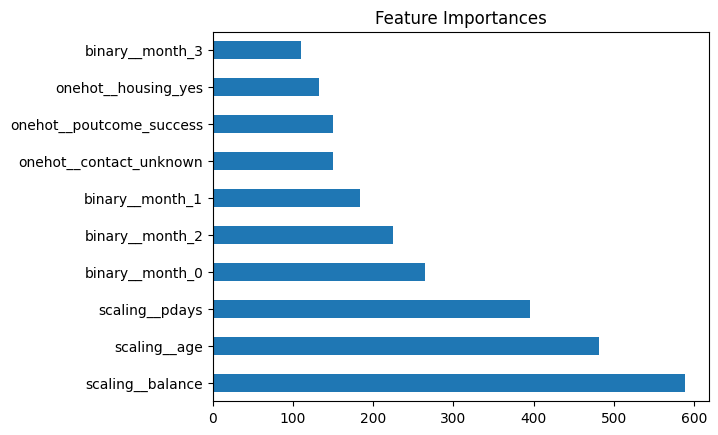

In [172]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Grafik diatas menunjukkan bahwa ternyata untuk model LGBM ini, fitur atau kolom `balance` adalah yang paling penting, lalu diikuti dengan `age`, `pdays`, `month` dan selanjutnya.

Nanti kedepannya sebenarnya kolom balance harus dihilangkan sementara bila model yg sudah dibuat ini ingin diaplikasikan untuk memprediksi calon nasabah sebelum mereka memulai atau melakukan deposit. Tetapi untuk kali ini, asumsi yang saya akan gunakan adalah untuk melakukan deposit itu tidak gratis (berbayar), jadi modelnya akan digunakan setelah calon nasabah selesai melakukan deposit. Hal ini untuk menyaring siapa yang perlu ditawarkan untuk kampanye pemasaran. Ini berarti model yang saya buat ini akan membantu mengurangi biaya (cost) dari segi promosi pemasaran, dimana calon nasabah yang perlu di tawarkan diharapkan jadi lebih tertuju, terarah dan efisien.

## I. Implementasi Model

Pada kampanye pemasaran bank, pertama-tama bank akan melakukan kampanye pemasaran pada semua orang lewat acara langsung (offline) di lokasi tertentu dan lewat promosi website dan brosur di jalan-jalan, dengan tema kampanye yaitu tentang `deposito berjangka` atau media penitipan uang di bank selama periode tertentu untuk menarik calon nasabah. Sambil melakukan kampanye, bank akan memberikan brosur kepada semua orang yang hadir pada acara kampanye tersebut, lalu calon nasabah yang tertarik untuk konsultasi lebih lanjut tentang informasi `deposito berjangka` bisa menghubungi pihak bank lewat `customer service` ketika kampanye sudah selesai atau langsung bertanya ketika kampanye masih berjalan.

Bank bisa melakukan pendataan atau mengumpulkan data calon nasabah pada kampanye berlangsung melalui hadir di acara kampanye tersebut lewat `pengisian formulir kehadiran` atau `datang langsung` dan belum sempat mengisi formulir kehadiran dikarenakan tahu informasi dari melihat brosur di tembok jalan atau rumah.

Setelah kampanye selesai, bagi calon nasabah yang benar-benar ingin benar-benar tertarik untuk melakukan deposit, maka data nasabah yang sebelumnya sudah ada pada saat `pengisian formulir kehadiran` akan dilakukan pembaruan data di bagian `balance`, `housing` dan `pdays`. Bagi yang belum berminat untuk melakukan deposit, maka pihak bank menghubungi calon nasabah baru melalui `undian nomor` atau melihat `tipe pekerjaan nasabah` secara manual, atau membagi `secara regional/ wilayah` dan `umur calon nasabah` secara manual. Tentu saja proses ini akan memakan waktu dan biaya bisa berminggu-minggu, bahkan berbulan-bulan untuk mencatat dan menghubungi semua calon nasabah. 

Dengan adanya machine learning, bisa mempercepat waktu dalam melakukan pendataan dan mempersempit ruang lingkup jangkauan berdasarkan prediksi perilaku calon nasabah seperti tipe pekerjaan nasabah`, `umur calon nasabah`, 'alamat' dan lain sebagainya. Setelah mendapatkan calon nasabah yang potensial, bisa melakukan kampanye lanjutan pada calon nasabah terpilih seperti kampanye pemasaran lewat e-mail, atau media kampanye yang lain. 

Proses Ini terjadi jika machine learning diterapkan ketika pencatatan/ pendataan belum selesai dilakukan. Apabila pendataan selesai dilakukan, maka bisa dilakukan koreksi atau verifikasi hasil prediksi terhadap data aktual apakah hasil prediksi sudah benar-benar sesuai dengan data aslinya, lalu lakukan kampanye lanjutan, yaitu sama prosesnya lewat pemasaran media e-mail, atau media kampanye yang lain. 

## J. Kesimpulan

In [173]:
# melihat performance model terbaik dalam bentuk classification report
print('Classification Report LGBM After Tuning : \n', report_tuned)

Classification Report LGBM After Tuning : 
               precision    recall  f1-score   support

           0       0.68      0.85      0.75      1223
           1       0.77      0.56      0.65      1119

    accuracy                           0.71      2342
   macro avg       0.72      0.70      0.70      2342
weighted avg       0.72      0.71      0.70      2342



Catatan:
- 1 : kelas positif, untuk calon nasabah yang sudah atau mau melakukan deposit
- 0 : kelas negatif, untuk calon nasabah yang tidak melakukan deposit

1. Berdasarkan hasil classification report dari model, dapat menyimpulkan/mengambil konklusi bahwa bila seandainya nanti menggunakan model untuk memfilter/menyaring list calon nasabah yang akan pihak bank coba tawarkan, maka model ini dapat mengurangi 85% calon nasabah yang tidak tertarik untuk melakukan deposit sehingga tidak perlu kita hampiri, dan model ini dapat mendapatkan 56% calon nasabah yang tertarik dari seluruh calon nasabah yang dihubungi. (semua ini berdasarkan `recallnya`).
2. Model ini ini memiliki ketepatan prediksi calon nasabah yang tertarik sebesar 77% (`precisionnya`), jadi jika model ini akan memprediksi bahwa seorang calon nasabah itu tertarik, maka kemungkinan tebakannya benar itu kurang lebih sebesar 77%. Maka, masih akan ada kandidat yang sebenarnya tidak tertarik tetapi diprediksi sebagai kandidat yang tertarik sekitar 15% dari keseluruhan calon nasabah yang tidak tertarik melakukan deposit (berdasarkan selisih `recall` kelas kelas nol pada keseluruhan).
3. Bila seandainya biaya untuk screening/menyaring data per kandidat itu 10$ (berdasarkan sumber dari https://blog.myskill.id/istilah-dan-tutorial/cost-per-acquisition-optimalkan-kampanye-dan-tingkatkan-efisiensi-biaya/, dan seandainya jumlah kandidat yang kita miliki untuk suatu kurun waktu sebanyak 200 orang (dimana andaikan 100 orang tertarik, dan 100 orang lagi tidak tertarik), maka hitungannya kurang lebih akan seperti ini :

Tanpa Model (semua kandidat kita check dan tawarkan) :
- Total Biaya => 100 x 10 USD = 1000 USD
- Total Kandidat Tertarik yang didapatkan => 100 orang (karena semua kita tawarkan)
- Total Kandidat Tertarik yang tidak didapatkan => 0 orang (karena semua kita tawarkan)
- Biaya yang terbuang => 100 x 10 USD = 1000 USD (karena 100 orang menolak dan menjadi sia-sia)
- Jumlah penghematan => 0 USD

Dengan Model (hanya kandidat yang diprediksi oleh model tertarik yang kita check dan tawarkan) :
- Total Biaya => (56 x 10 USD) + (15 x 10 USD) = 560 USD + 150 USD = 810 USD
- Total Kandidat Tertarik yang didapatkan => 56 orang (karena recall positif, atau tertarik itu 56%)
- Total Kandidat Tertarik yang tidak didapatkan => 54 orang (karena recall positif, atau tertarik itu 56%)
- Biaya yang terbuang => 15 x 10 USD = 150 USD (berdasarkan recall negatif atau tidak tertarik (15 orang menolak tawaran/tidak tertarik))
- Jumlah penghematan => 85 x 10 USD = 850 USD (yang dihitung hanya yang memang tidak tertarik saja)

Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model ini, maka perusahaan tersebut akan menghemat biaya yang cukup besar tanpa mengorbankan terlalu banyak jumlah calon nasabah potensial atau nasabah yg tertarik.

## K. Rekomendasi

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya dengan lebih baik lagi yaitu:
- Berdasarkan model machine learning
1. Menambahkan fitur atau kolom-kolom baru yang memungkinkan untuk bisa berhubungan dengan ketertarikan calon nasabah, seperti alamat calon nasabah (untuk menghitung jarak dari tempat tinggalnya ke kantor perusahaan tersebut), tempat tinggal sekarang (untuk melakukan simulasi pemetaan wilayah atau region), biaya setiap melakukan satu kali kampanye (karena dibutuhkan untuk perhitungan metriks biaya per pelanggan).
2. Mencoba algoritma Machine Learning yang lain yang lebih kompleks dan juga mencoba hyperparameter tuning kembali, atau coba gunakan teknik resampling yang seperti Random Over Sampling, SMOTENC, karena data pada model ini tidak memakai metode resampling.
3. Menganalisis data-data yang model ini yang masih salah prediksi untuk mengetahui alasannya dan karakteristiknya bagaimana.
4. Membuat pendataan untuk nasabah-nasabah lama pada periode kampanye di masa lalu, karena ini berhubungan dengan metrik bisnis perusahaan yang mengukur kesetiaan pelanggan.

- Berdasarkan metrik bisnis
1. Menambahkan metrik bisnis yang berkaitan dengan kesetiaan pelanggan, seperti retention rate, churn rate, untuk membandingkan dari periode kampanye pemasaran tertentu, mana nasabah yang masih setia dan mana yang sudah meninggalkan layanan penyimpanan `deposito berjangka`, lalu dibandingkan dengan jumlah calon nasabah periode kampanye baru yang berhasil melakukan deposit.
2. Mengintegrasikan lebih banyak alternative customer service seperti Ai chatbot yang memberikan informasi seputar pertanyaan mendasar tentang `deposito berjangka` untuk menarik lebih banyak minat nasabah baru pada website
3. Memberikan cerita-cerita kesuksesan atau interview tanya jawab pada nasabah lama tentang permasalahan ketika meminjam uang ke bank dan bagaimana tips mereka supaya berhasil dalam memanfaatkan `deposito berjangka` itu.

(Dibuat pada 28 mei 2024)

# <center>Thank You...